# 1. SVR : support vector regressor
# 2. SVC : support vector classifier

# SVC : support vector classifier
    - ** Hyperplane Equation ** : In a binary classification problem, the goal is to find a hyperplane that separates the data points of two classes. Mathematically, a hyperplane is defined by the equation:w*x+b=0Here, w is the weight vector perpendicular to the hyperplane, x represents a data point, and b is the bias term.
    - **Margins** : The margin is the distance between the hyperplane and the nearest data points from each class. The larger the margin, the more confident we are in the classification. The margin can be calculated as the distance between two parallel hyperplanes, one for each class. Mathematically, the margin is inversely proportional to the norm of the weight vector w.
    - **Support Vectors** : Support vectors are the data points that are closest to the hyperplane. These are the points that play a crucial role in determining the position of the hyperplane. The support vectors are the ones that contribute to the margin calculation.
    - **Soft Margin** : In real-world datasets, it's often not possible to have a perfect separation between classes. The concept of a soft margin SVM allows for some misclassification by allowing data points to be on the wrong side of the margin or even the wrong side of the hyperplane. This is controlled by introducing slack variables.
    - **hard margin** , the goal is to find the hyperplane that can perfectly separate the data into two classes without any misclassificatio 

    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

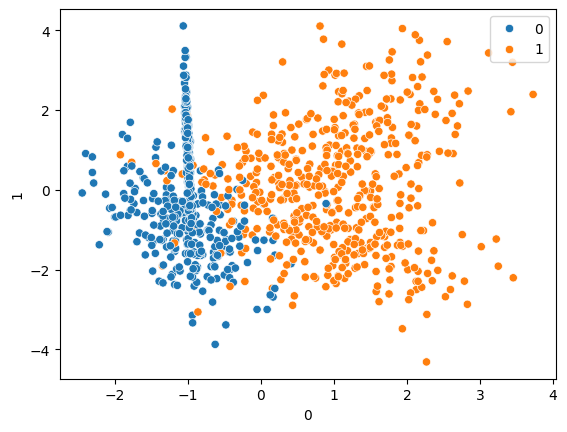

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, 
                                test_size=0.25,
                                random_state=10)

In [6]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [7]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [8]:
## Prediction
y_pred=svc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       129
           1       0.94      0.93      0.94       121

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[122   7]
 [  8 113]]
0.94


# Hyperparametere Tuning With SVC

In [12]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [17]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [15]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       129
           1       0.95      0.92      0.93       121

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[123   6]
 [ 10 111]]
0.94
